<a href="https://colab.research.google.com/github/m7moud27/mahmoud-reda/blob/master/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd / gdrive


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
[Errno 2] No such file or directory: '/ gdrive'
/content


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

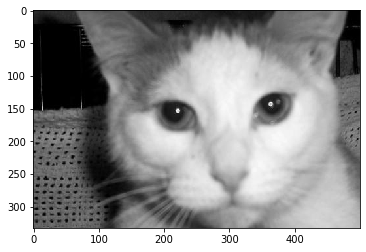

In [5]:
DATADIR = "/gdrive/My Drive/PetImages"

CATEGORIES = ["Cat", "Dog"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [0]:
print(img_array)


In [8]:
print(img_array.shape)

(333, 500)


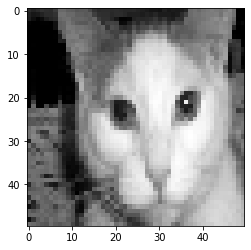

In [9]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

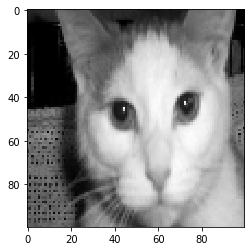

In [10]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [11]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 12513/12513 [1:37:41<00:00,  2.28it/s]

24968


In [14]:
import random
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])


0
0
1
0
0
1
1
1
0
0


In [15]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 81]
   [ 74]
   [ 68]
   ...
   [132]
   [133]
   [136]]

  [[ 68]
   [ 79]
   [ 79]
   ...
   [128]
   [134]
   [134]]

  [[ 50]
   [ 63]
   [ 66]
   ...
   [133]
   [136]
   [136]]

  ...

  [[ 66]
   [ 52]
   [ 74]
   ...
   [ 59]
   [ 52]
   [ 78]]

  [[ 82]
   [ 72]
   [ 78]
   ...
   [121]
   [ 85]
   [ 67]]

  [[ 55]
   [ 64]
   [ 77]
   ...
   [ 91]
   [ 77]
   [ 98]]]]


In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
X = X/255.0

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [18]:
dense_layers = [0,1,2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPool2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPool2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])
model.save('cat vs dog.model')

1-conv-32-nodes-0-dense-1582561242
Train on 17477 samples, validate on 7491 samples
Epoch 1/10
17477/17477 [==============================] - 6s 317us/sample - loss: 0.6140 - acc: 0.6589 - val_loss: 0.5482 - val_acc: 0.7273
Epoch 2/10
17477/17477 [==============================] - 5s 285us/sample - loss: 0.5289 - acc: 0.7375 - val_loss: 0.5311 - val_acc: 0.7385
Epoch 3/10
17477/17477 [==============================] - 5s 294us/sample - loss: 0.4809 - acc: 0.7766 - val_loss: 0.5905 - val_acc: 0.6994
Epoch 4/10
17477/17477 [==============================] - 5s 287us/sample - loss: 0.4417 - acc: 0.8000 - val_loss: 0.5252 - val_acc: 0.7485
Epoch 5/10
17477/17477 [==============================] - 5s 293us/sample - loss: 0.4029 - acc: 0.8229 - val_loss: 0.5338 - val_acc: 0.7481
Epoch 6/10
17477/17477 [==============================] - 5s 287us/sample - loss: 0.3755 - acc: 0.8384 - val_loss: 0.5365 - val_acc: 0.7484
Epoch 7/10
17477/17477 [==============================] - 5s 290us/sample - 

In [24]:
filepath='/content/download.jpg' #dog
def prepare(filepath):
    IMG_SIZE = 100 # 100 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model('cat vs dog.model')

prediction = model.predict([prepare(filepath)])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

[[1.]]
Dog
